In [1]:
from numpy.random import seed
from tensorflow import set_random_seed
seed(1)
set_random_seed(2)

import numpy as np
import pandas as pd
from sklearn import preprocessing
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import SimpleRNN
from keras.layers import Flatten
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.utils import plot_model
from numpy.random import seed

from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
data = pd.read_csv("D:\\School\\Spring_2019\\GraduateProject\\Stock Data\\AMZN.csv",header=0,usecols=['Date','Close'],parse_dates=True,index_col='Date')

In [25]:
# Scaled data such that it is centered at 0 with unit variance.
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
DataScaled = scaler.fit_transform(data)

In [26]:
TrainLen = int(len(DataScaled)*.9)
TestLen = len(DataScaled) - TrainLen
TrainData = DataScaled[0:TrainLen,:]
TestData = DataScaled[TrainLen:len(DataScaled),:]

In [27]:
def DatasetCreation(dataset,TimeStep=1):
    DataX, DataY = [],[]
    for i in range(len(dataset)-TimeStep-1):
        a = dataset[i:(i+TimeStep),0]
        DataX.append(a)
        DataY.append(dataset[i+TimeStep,0])
    return np.array(DataX),np.array(DataY)

In [31]:
TimeStep = 5
TrainX,TrainY = DatasetCreation(TrainData,TimeStep)
TestX,TestY = DatasetCreation(TestData,TimeStep)

In [32]:
TrainX = np.reshape(TrainX,(TrainX.shape[0],1,TrainX.shape[1]))
TestX = np.reshape(TestX,(TestX.shape[0],1,TestX.shape[1]))

In [33]:
AMZN = Sequential()

#Simple LSTM #
AMZN.add(LSTM(32,return_sequences=True,input_shape=(1,TimeStep)))
AMZN.add(Dropout(.2))
AMZN.add(LSTM(64,return_sequences=True))
AMZN.add(Dropout(0.02))
AMZN.add(LSTM(128))
#AMZN.add(LSTM(64, return_sequences=False))


AMZN.add(Dense(1))

In [14]:
steps_per_epoch = np.ceil(TrainX.shape[0]/128)
#RMSprop
AMZN.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mae','mse'])
history = AMZN.fit(TrainX,TrainY,epochs=100,batch_size=100,verbose=1)

Epoch 1/100
4972/4972 [==============================] - 2s 348us/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_squared_error: 0.0034
Epoch 2/100
4972/4972 [==============================] - 1s 126us/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_squared_error: 2.2661e-05
Epoch 3/100
4972/4972 [==============================] - 1s 132us/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_squared_error: 9.1932e-06
Epoch 4/100
4972/4972 [==============================] - 1s 122us/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_squared_error: 8.8388e-06
Epoch 5/100
4972/4972 [==============================] - 1s 123us/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_squared_error: 8.5939e-06
Epoch 6/100
4972/4972 [==============================] - 1s 125us/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_squared_error: 8.4508e-06
Epoch 7/100
4972/4972 [==============================] - 1s 131us/step - loss: 0.0017 - mean_absolute_error: 0

In [58]:
TrainPred = AMZN.predict(TrainX)
TestPred = AMZN.predict(TestX)

In [125]:
print(TestY[0:5])
print(TestX[0:5])

[0.41630846 0.41470402 0.41441456 0.41661266 0.41783928]
[[[0.41744186 0.41403184 0.41570006 0.4139337  0.41787854 0.41583251]]

 [[0.41403184 0.41570006 0.4139337  0.41787854 0.41583251 0.41630846]]

 [[0.41570006 0.4139337  0.41787854 0.41583251 0.41630846 0.41470402]]

 [[0.4139337  0.41787854 0.41583251 0.41630846 0.41470402 0.41441456]]

 [[0.41787854 0.41583251 0.41630846 0.41470402 0.41441456 0.41661266]]]


In [106]:
print(TestPred.shape)
#print(TestX[TimeStep:])
print(TestX[0:5])
TestX[:,0,0]

(551, 1)
[[[0.41744186]]

 [[0.41403184]]

 [[0.41570006]]

 [[0.4139337 ]]

 [[0.41787854]]]


array([0.41744186, 0.41403184, 0.41570006, 0.4139337 , 0.41787854,
       0.41583251, 0.41630846, 0.41470402, 0.41441456, 0.41661266,
       0.41783928, 0.41757434, 0.41861943, 0.41760869, 0.41782455,
       0.41804535, 0.41750073, 0.41978715, 0.41303092, 0.41541547,
       0.41508183, 0.41421338, 0.41480707, 0.41931123, 0.42829994,
       0.42929106, 0.43429566, 0.43673421, 0.44425096, 0.44545306,
       0.44005591, 0.43838769, 0.44435398, 0.44205774, 0.43905006,
       0.43337815, 0.4418762 , 0.44275449, 0.4405073 , 0.44191055,
       0.44017858, 0.44453552, 0.44463856, 0.44545794, 0.44991796,
       0.45316115, 0.46456384, 0.46393091, 0.46103119, 0.45931391,
       0.45765551, 0.46496126, 0.46681593, 0.46491712, 0.46426455,
       0.47100116, 0.46934276, 0.47331704, 0.4628613 , 0.46959791,
       0.4702603 , 0.47557402, 0.47600088, 0.4803235 , 0.48671668,
       0.48789425, 0.48834564, 0.48732508, 0.48797766, 0.49326684,
       0.49552876, 0.49143673, 0.49490563, 0.49500376, 0.47932

In [116]:
np.mean(scaler.inverse_transform(TestY.reshape(-1,1)) - scaler.inverse_transform(TestPred))


8.539637962738205

In [138]:
predictionVectorForMay06.shape

(30,)

In [34]:
predictionVectorForMay06 = np.zeros(30)
for i in range(30):
    steps_per_epoch = np.ceil(TrainX.shape[0]/128)
    #RMSprop
    AMZN.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mae','mse'])
    history = AMZN.fit(TrainX,TrainY,epochs=30,batch_size=100,verbose=0)
    
    #TrainPred = AMZN.predict(TrainX)
    TestPred = AMZN.predict(TestX)
    
#     TrainPred = scaler.inverse_transform(TrainPred)
#     TrainY = scaler.inverse_transform([TrainY])
#     TestPred = scaler.inverse_transform(TestPred)
#     TestY = scaler.inverse_transform([TestY])
    
    #lastVal = np.asarray([[[0.93195177,0.96219542,0.95635183]]])
    #TestPredTest = AMZN.predict(lastVal)#.reshape(-1,1,1))
    
    predictionVectorForMay06[i] = np.mean(scaler.inverse_transform(TestY.reshape(-1,1)) - scaler.inverse_transform(TestPred))
    print("Iterations Complete: ",i+1)
    if(i==29):
        print("MAD Average: ",np.mean(predictionVectorForMay06))
        print("MAD St. Dev: ",np.std(predictionVectorForMay06))

Iterations Complete:  1
Iterations Complete:  2
Iterations Complete:  3
Iterations Complete:  4
Iterations Complete:  5
Iterations Complete:  6
Iterations Complete:  7
Iterations Complete:  8
Iterations Complete:  9
Iterations Complete:  10
Iterations Complete:  11
Iterations Complete:  12
Iterations Complete:  13
Iterations Complete:  14
Iterations Complete:  15
Iterations Complete:  16
Iterations Complete:  17
Iterations Complete:  18
Iterations Complete:  19
Iterations Complete:  20
Iterations Complete:  21
Iterations Complete:  22
Iterations Complete:  23
Iterations Complete:  24
Iterations Complete:  25
Iterations Complete:  26
Iterations Complete:  27
Iterations Complete:  28
Iterations Complete:  29
Iterations Complete:  30
MAD Average:  482.4004726120126
MAD St. Dev:  92.93005495217525


In [139]:
print(np.mean(predictionVectorForMay06))
print(np.std(predictionVectorForMay06))

13.521838905110082
8.107196555021261


In [45]:
TrainPred = scaler.inverse_transform(TrainPred)
TrainY = scaler.inverse_transform([TrainY])
TestPred = scaler.inverse_transform(TestPred)
TestY = scaler.inverse_transform([TestY])

In [51]:
TestY - TestPred.reshape(-1,1)

array([[-3.42102054e+00,  4.61901846e+00,  4.48974465e-01, ...,
         1.06305902e+03,  1.05235895e+03,  1.11399896e+03],
       [-1.12573245e+00,  6.91430655e+00,  2.74426255e+00, ...,
         1.06535431e+03,  1.05465424e+03,  1.11629425e+03],
       [-6.89813235e+00,  1.14190665e+00, -3.02813735e+00, ...,
         1.05958191e+03,  1.04888184e+03,  1.11052185e+03],
       ...,
       [-1.07075848e+03, -1.06271844e+03, -1.06688849e+03, ...,
        -4.27844191e+00, -1.49785159e+01,  4.66614991e+01],
       [-1.05670258e+03, -1.04866254e+03, -1.05283258e+03, ...,
         9.77746629e+00, -9.22607711e-01,  6.07174073e+01],
       [-1.04555682e+03, -1.03751678e+03, -1.04168683e+03, ...,
         2.09232182e+01,  1.02231442e+01,  7.18631592e+01]])

In [ ]:
TrainPredictPlot = np.empty_like(DataScaled)
TrainPredictPlot[:,:] = np.nan
TrainPredictPlot[1:len(TrainPred)+1,:] = TrainPred

In [ ]:
TestPredictPlot = np.empty_like(DataScaled)
TestPredictPlot[:,:] = np.nan
TestPredictPlot.shape
# TestPredictPlot[len(TrainPred)+(TimeStep*2)+1:len(DataScaled)-1,:] = TestPred
# TestPredictPlot[len(TrainPred)+2*TimeStep:len(DataScaled),:] = TestPred
TestPredictPlot[len(TrainPred)+TimeStep:len(DataScaled)-TimeStep-2] = TestPred

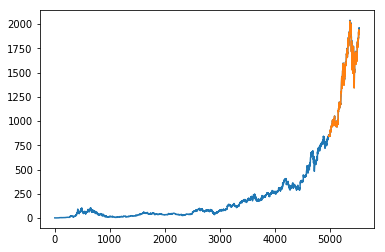

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [35]:
plt.plot(scaler.inverse_transform(DataScaled))
#plt.plot(TrainPredictPlot)
#plt.plot(TestPredictPlot)
plt.plot(TestPredictPlot)
plt.show()
TestData
TestPredictPlot

In [36]:
predictions = np.zeros(len(TestPred))
for i in range(TimeStep,len(TestPred)):
    predictions[i] = TestPred[i-TimeStep]

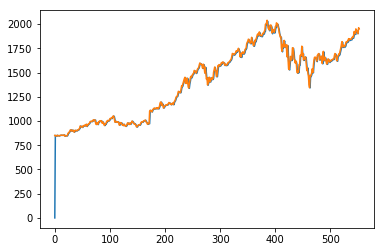

In [37]:
plt.plot(predictions)
plt.plot(scaler.inverse_transform(TestData))

In [39]:
predictions[2:].shape
scaler.inverse_transform(TestData).shape
TestData_r = scaler.inverse_transform(TestData)

TestData_r.shape
predictions[2:].shape
TestData
#print(np.mean(abs(predictions[2:]-scaler.inverse_transform(TestData))))
#print(np.mean(abs((predictions-test[:274])/test[:274]))*100)

array([[0.41744186],
       [0.41403184],
       [0.41570006],
       [0.4139337 ],
       [0.41787854],
       [0.41583251],
       [0.41630846],
       [0.41470402],
       [0.41441456],
       [0.41661266],
       [0.41783928],
       [0.41757434],
       [0.41861943],
       [0.41760869],
       [0.41782455],
       [0.41804535],
       [0.41750073],
       [0.41978715],
       [0.41303092],
       [0.41541547],
       [0.41508183],
       [0.41421338],
       [0.41480707],
       [0.41931123],
       [0.42829994],
       [0.42929106],
       [0.43429566],
       [0.43673421],
       [0.44425096],
       [0.44545306],
       [0.44005591],
       [0.43838769],
       [0.44435398],
       [0.44205774],
       [0.43905006],
       [0.43337815],
       [0.4418762 ],
       [0.44275449],
       [0.4405073 ],
       [0.44191055],
       [0.44017858],
       [0.44453552],
       [0.44463856],
       [0.44545794],
       [0.44991796],
       [0.45316115],
       [0.46456384],
       [0.463

In [9]:
print(np.mean(abs(predictions[TimeStep:]-TestData_r[:len(TestData_r)-2*TimeStep-1].reshape(-1))))
#print(np.mean(abs((predictions-test[:274])/test[:274]))*100)

NameError: name 'predictions' is not defined

In [9]:
lastVal = np.asarray([[[0.95635183]]]) # originally .96219542
TestPredTest = AMZN.predict(lastVal)#.reshape(-1,1,1))
scaler.inverse_transform(TestPredTest)

array([[24.075714]], dtype=float32)

In [24]:
predictionVectorForMay06 = np.zeros(30)
for i in range(30):
    steps_per_epoch = np.ceil(TrainX.shape[0]/128)
    #RMSprop
    AMZN.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mae','mse'])
    history = AMZN.fit(TrainX,TrainY,epochs=30,batch_size=100,verbose=0)
    
    TrainPred = AMZN.predict(TrainX)
    TestPred = AMZN.predict(TestX)
    
#     TrainPred = scaler.inverse_transform(TrainPred)
#     TrainY = scaler.inverse_transform([TrainY])
#     TestPred = scaler.inverse_transform(TestPred)
#     TestY = scaler.inverse_transform([TestY])
    
    lastVal = np.asarray([[[0.95635183]]])
    TestPredTest = AMZN.predict(lastVal)#.reshape(-1,1,1))
    
    predictionVectorForMay06[i] = scaler.inverse_transform(TestPredTest)
    print("Iterations Complete: ",i+1)

KeyboardInterrupt: 

In [29]:
predictionVectorForMay06 = np.zeros(30)
for i in range(30):
    steps_per_epoch = np.ceil(TrainX.shape[0]/128)
    #RMSprop
    AMZN.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mae','mse'])
    history = AMZN.fit(TrainX,TrainY,epochs=30,batch_size=100,verbose=0)
    
    TrainPred = AMZN.predict(TrainX)
    #TestPred = AMZN.predict(TestX)
    
#     TrainPred = scaler.inverse_transform(TrainPred)
#     TrainY = scaler.inverse_transform([TrainY])
#     TestPred = scaler.inverse_transform(TestPred)
#     TestY = scaler.inverse_transform([TestY])
    
    lastVal = np.asarray([[[0.93195177,0.96219542,0.95635183]]])
    TestPredTest = AMZN.predict(lastVal)#.reshape(-1,1,1))
    
    predictionVectorForMay06[i] = scaler.inverse_transform(TestPredTest)
    print("Iterations Complete: ",i+1)

Iterations Complete:  1
Iterations Complete:  2
Iterations Complete:  3
Iterations Complete:  4
Iterations Complete:  5
Iterations Complete:  6
Iterations Complete:  7
Iterations Complete:  8
Iterations Complete:  9
Iterations Complete:  10
Iterations Complete:  11
Iterations Complete:  12
Iterations Complete:  13
Iterations Complete:  14
Iterations Complete:  15
Iterations Complete:  16
Iterations Complete:  17
Iterations Complete:  18
Iterations Complete:  19
Iterations Complete:  20
Iterations Complete:  21
Iterations Complete:  22
Iterations Complete:  23
Iterations Complete:  24
Iterations Complete:  25
Iterations Complete:  26
Iterations Complete:  27
Iterations Complete:  28
Iterations Complete:  29
Iterations Complete:  30


In [33]:
print(np.mean(predictionVectorForMay06),
np.std(predictionVectorForMay06),
np.min(predictionVectorForMay06),
np.max(predictionVectorForMay06))

1948.2378662109375 12.816737283494865 1924.418701171875 1975.015380859375


In [31]:
predictionVectorForMay06

array([1944.05810547, 1958.26293945, 1931.36889648, 1924.41870117,
       1948.59350586, 1966.78430176, 1975.01538086, 1969.59594727,
       1968.37915039, 1951.80151367, 1945.16125488, 1949.49584961,
       1949.5489502 , 1947.16247559, 1949.61352539, 1948.6192627 ,
       1954.46447754, 1962.35827637, 1942.7019043 , 1927.35717773,
       1938.02648926, 1936.11987305, 1934.51940918, 1938.36401367,
       1951.53869629, 1931.04272461, 1945.23046875, 1939.48669434,
       1950.65356445, 1967.39245605])

In [32]:
np.asarray([[[.962,0.95635183]]])

array([[[0.962     , 0.95635183]]])